### 0. Подгружаем библиотеки

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

### 1. Загружаем данные

In [28]:
df = pd.read_csv("Davis.csv")
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [29]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True) # Отбрасываем ненужную колонку 'Unnamed: 0'
df.columns

Index(['sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')

In [30]:
df.columns = ["пол", "вес", "рост", "заявленный вес", "заявленный рост"] # Переименуем колонки

### 2. Разведочный анализ данных

In [31]:
# Найдём число пропущенных строчек
df.isna().sum()

пол                 0
вес                 0
рост                0
заявленный вес     17
заявленный рост    17
dtype: int64

In [32]:
# В процентном соотношении
df.isna().sum() * 100 / len(df)

пол                0.0
вес                0.0
рост               0.0
заявленный вес     8.5
заявленный рост    8.5
dtype: float64

In [33]:
df[df.isna().any(axis = 1)]

,пол,вес,рост,заявленный вес,заявленный рост
46,M,73,180,NaN,NaN
47,F,49,161,NaN,NaN
54,M,64,177,NaN,NaN
56,F,66,170,65.0,NaN
75,F,50,171,NaN,NaN
99,F,55,155,NaN,154.0
124,M,67,179,NaN,NaN
125,F,52,169,56.0,NaN
126,F,47,153,NaN,154.0
137,F,62,167,NaN,NaN


In [34]:
df.shape

(200, 5)

Данных не так уж и много, попробуем восстановить пропущенные значения с помощью **интерполяции** в Pandas

In [35]:
df.interpolate(method = "linear", inplace = True) # В данном случае интерполяция линейная

In [36]:
df.isna().sum()

пол                0
вес                0
рост               0
заявленный вес     0
заявленный рост    0
dtype: int64

Можно было бы и отбросить строчки хотя бы с одним пропущенным значением, но данных у нас не так уж и много. Проверим данные на наличие выбросов.

In [37]:
# Описательная статистика
df.describe()

,вес,рост,заявленный вес,заявленный рост
count,200.000000,200.000000,200.000000,200.000000
mean,65.800000,170.020000,65.415000,168.432500
std,15.095009,12.007937,13.605011,9.305761
min,39.000000,57.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,160.750000
50%,63.000000,169.500000,63.000000,168.000000
75%,74.000000,177.250000,73.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


Видим аномальные значения в колонке **вес** (максимальный вес составляет 166 килограмм, в то время как 75% наблюдений лежат в диапазоне от 39 до 74, то есть в пределах 3 сигм). Построим ящики с усами для наших данных

Text(0.5, 1.0, 'Заявленный рост')

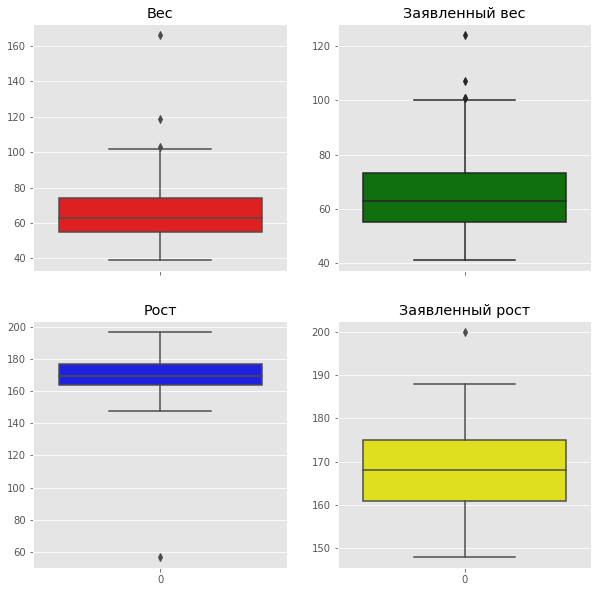

In [38]:
fig, axes = plt.subplots(2, 2, sharex = True)

sns.boxplot(ax = axes[0, 0], data = df["вес"], color = "red")
axes[0, 0].set_title("Вес")

sns.boxplot(ax = axes[0, 1], data = df["заявленный вес"], color = "green")
axes[0, 1].set_title("Заявленный вес")

sns.boxplot(ax = axes[1, 0], data = df["рост"], color = "blue")
axes[1, 0].set_title("Рост")

sns.boxplot(ax = axes[1, 1], data = df["заявленный рост"], color = "yellow")
axes[1, 1].set_title("Заявленный рост")

В каждой из колонок мы наблюдаем выбросы. Отбросим данные превышающие по модулю 3 стандартных отклонений.

In [39]:
df_numerate = df.select_dtypes(include = [np.number])
z_score = np.abs(stats.zscore(df_numerate))
df = df[(z_score < 2).all(axis = 1)]

In [40]:
df.describe()

,вес,рост,заявленный вес,заявленный рост
count,186.000000,186.000000,186.000000,186.000000
mean,63.569892,169.650538,63.666667,167.448925
std,11.129603,7.962169,11.157096,8.263487
min,39.000000,150.000000,41.000000,150.000000
25%,55.000000,164.000000,55.000000,160.000000
50%,62.000000,169.000000,62.000000,166.750000
75%,70.000000,176.000000,71.000000,175.000000
max,90.000000,189.000000,91.000000,185.000000


Text(0.5, 1.0, 'Заявленный рост')

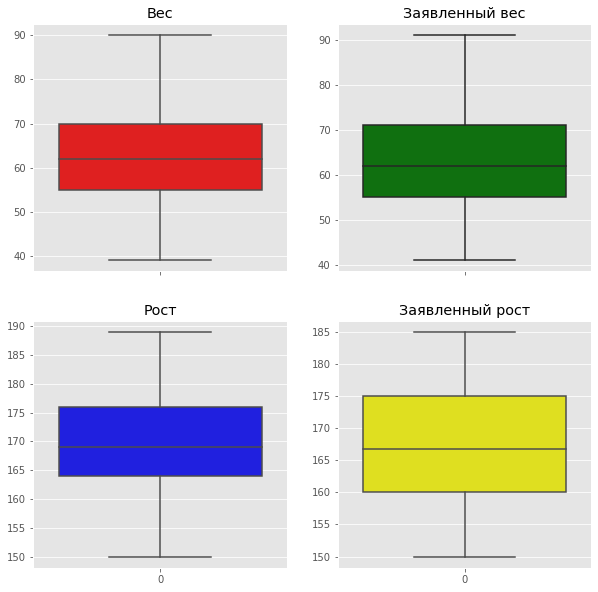

In [41]:
fig, axes = plt.subplots(2, 2, sharex = True)

sns.boxplot(ax = axes[0, 0], data = df["вес"], color = "red")
axes[0, 0].set_title("Вес")

sns.boxplot(ax = axes[0, 1], data = df["заявленный вес"], color = "green")
axes[0, 1].set_title("Заявленный вес")

sns.boxplot(ax = axes[1, 0], data = df["рост"], color = "blue")
axes[1, 0].set_title("Рост")

sns.boxplot(ax = axes[1, 1], data = df["заявленный рост"], color = "yellow")
axes[1, 1].set_title("Заявленный рост")

От выбросов и отсутствующих значений мы избавились. Разделим нашу выборку на тренировочную и тестовую

In [42]:
df[df["пол"] == "F"].shape, df[df["пол"] == "M"].shape

((110, 5), (76, 5))

In [43]:
size = int(len(df) * 0.7) # Тренировочный набор состоит из 70% наблюдений, соответственно тестовый - из 30%
train, test = df[:size], df[size:]
train.shape, test.shape

((130, 5), (56, 5))

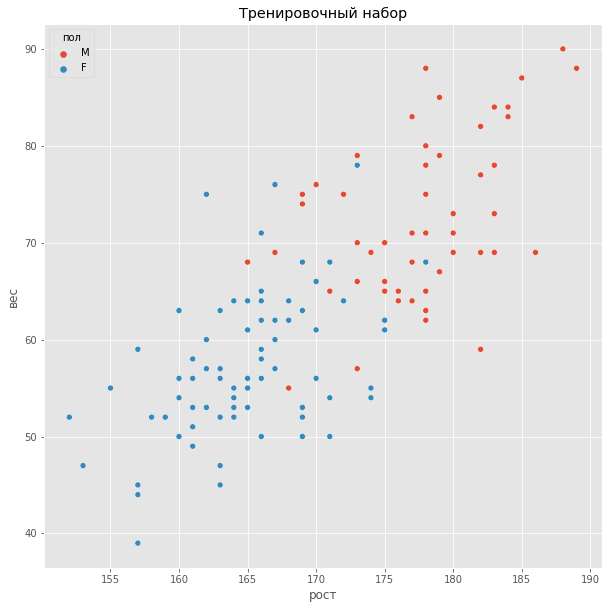

In [44]:
sns.scatterplot(data = train, hue = "пол", x = "рост", y = "вес");
plt.title("Тренировочный набор");

Построим гистограммы

* Роста и веса (в целом, только женщины, только мужчины)

In [45]:
male = df[df["пол"] == "M"].copy()
female = df[df["пол"] == "F"].copy()

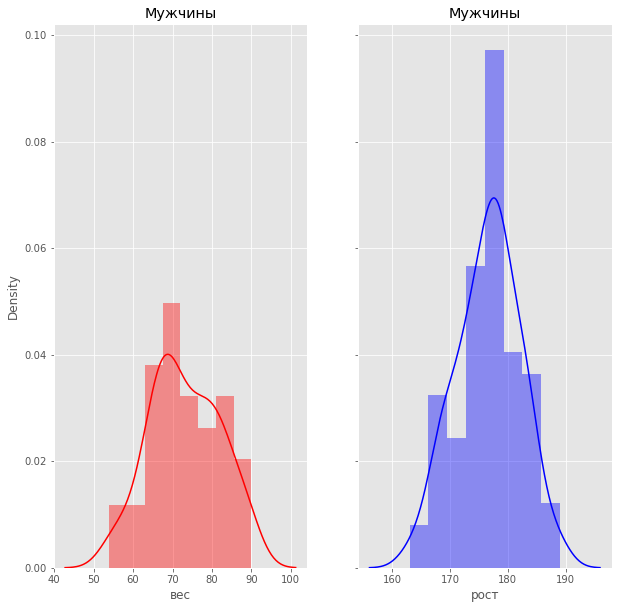

In [46]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 10))

sns.distplot(male["вес"], ax = axes[0], bins = "auto", color = "red");
sns.distplot(male["рост"], ax = axes[1], bins = "auto", color = "blue");
axes[0].set_title("Мужчины");
axes[1].set_title("Мужчины");

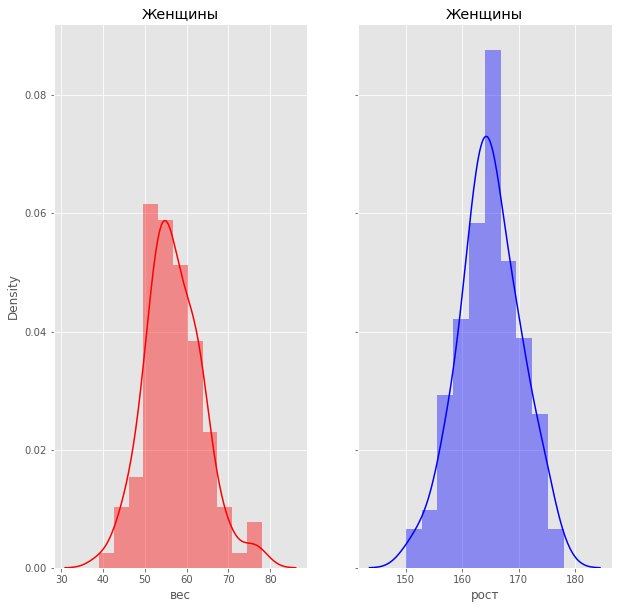

In [47]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 10))

sns.distplot(female["вес"], ax = axes[0], bins = "auto", color = "red");
sns.distplot(female["рост"], ax = axes[1], bins = "auto", color = "blue");
axes[0].set_title("Женщины");
axes[1].set_title("Женщины");

* Величины (заявленный вес - вес) (в целом, только женщины, только мужчины)

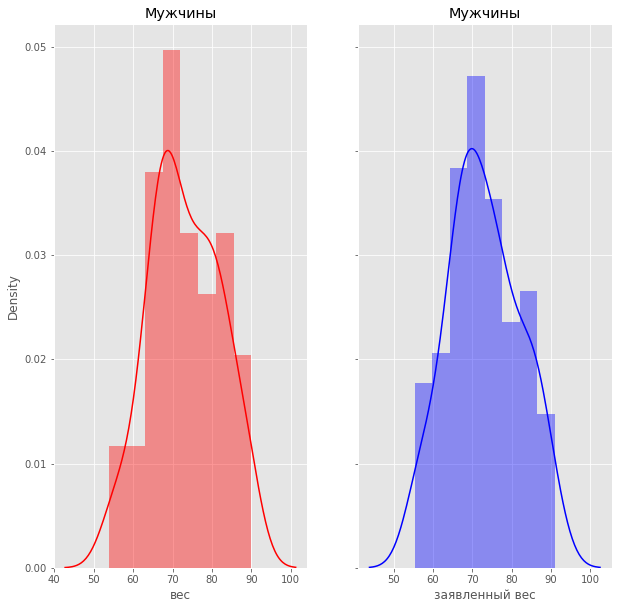

In [48]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 10))

sns.distplot(male["вес"], ax = axes[0], bins = "auto", color = "red");
sns.distplot(male["заявленный вес"], ax = axes[1], bins = "auto", color = "blue");
axes[0].set_title("Мужчины");
axes[1].set_title("Мужчины");

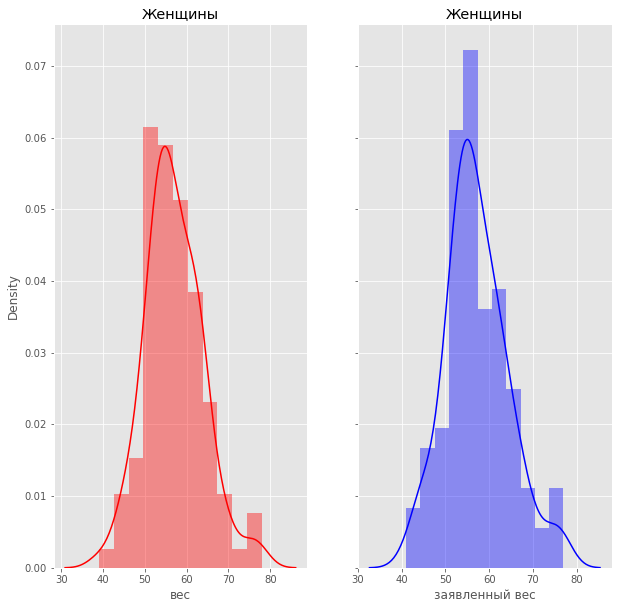

In [49]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 10))

sns.distplot(female["вес"], ax = axes[0], bins = "auto", color = "red");
sns.distplot(female["заявленный вес"], ax = axes[1], bins = "auto", color = "blue");
axes[0].set_title("Женщины");
axes[1].set_title("Женщины");

* Величины (заявленный рост - рост) (в целом, только женщины, только мужчины)

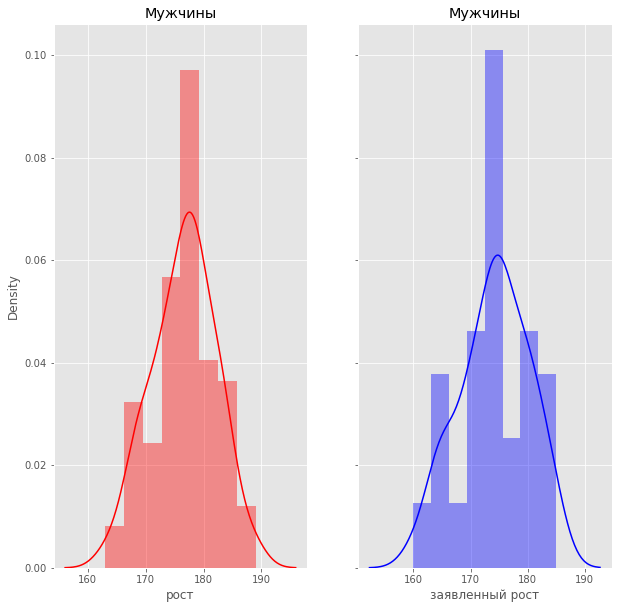

In [50]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 10))

sns.distplot(male["рост"], ax = axes[0], bins = "auto", color = "red");
sns.distplot(male["заявленный рост"], ax = axes[1], bins = "auto", color = "blue");
axes[0].set_title("Мужчины");
axes[1].set_title("Мужчины");

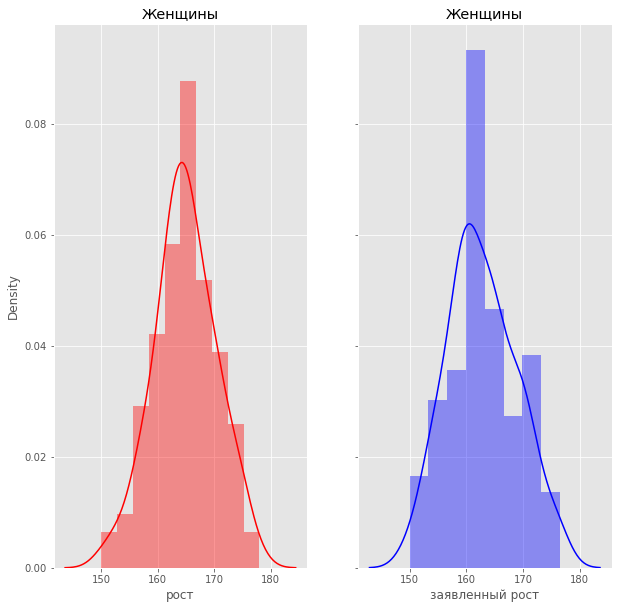

In [51]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 10))

sns.distplot(female["рост"], ax = axes[0], bins = "auto", color = "red");
sns.distplot(female["заявленный рост"], ax = axes[1], bins = "auto", color = "blue");
axes[0].set_title("Женщины");
axes[1].set_title("Женщины");

In [73]:
class LinearRegression:
    def __init__(self, iterations, learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate
        
    def update_weights(self):
        predictions = self.predict(self.train_x)
        
        dW = - ( 2 * ( self.train_x.T ).dot( self.train_y - predictions)) / self.m
        db = - 2 * np.sum( self.train_y - predictions) / self.m 
        
        self.W = self.W - self.learning_rate * dW 
        self.b = self.b - self.learning_rate * db 
        
        return self
        
    def fit(self, train_x, train_y):
        self.m, self.n = train_x.shape
        
        self.W = np.zeros(self.n)
        self.b = 0
        self.train_x = train_x
        self.train_y = train_y
        
        for i in range(self.iterations):
            self.update_weights()
            
        return self
    

    
    def predict(self, train_x):
        return train_x.dot(self.W) + self.b

In [66]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [64]:
X = make_regression(n_samples = 25, 
                       n_features = 1, 
                       n_informative = 1, 
                       n_targets = 1, 
                       coef = True, 
                       random_state = 0, 
                       noise = 0.5)
x, y = X[0], X[1]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.33, random_state = 0)

In [85]:
model = LinearRegression(iterations = 10000, learning_rate = 0.01)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
              
print("Предсказания: ", np.round(predictions[:], 2))
print("Истинные значения: ", np.round(y_test[:], 2))
print("R^2: ", r2)

Предсказания:  [-0.98  0.04 -0.1   3.26  1.51  0.63  0.74  3.22 -0.83  0.6   1.47  2.72
  1.35  1.07 -3.29 -1.15 -0.03]
Истинные значения:  [-1.67 -0.48 -0.26  3.44  2.61  1.12  0.86  4.49 -1.51  0.57  2.48  3.58
  1.13  1.45 -4.89 -2.38  0.61]
R^2:  0.8822400807050427


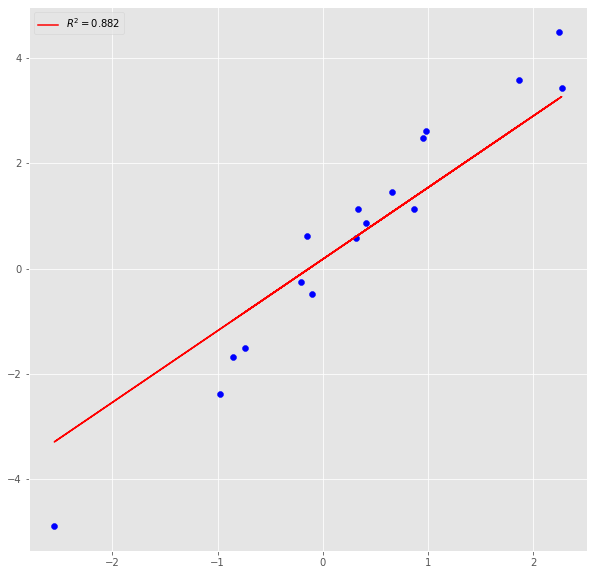

In [88]:
plt.scatter(X_test, y_test, color = 'blue' )    
plt.plot(X_test, predictions, color = 'red', label = "$R^2 = {}$".format(np.round(r2, 3))) 
plt.legend()
plt.show() 